# PHIGHT COVID capstone project

# data processing and cleaning

author: Daniel Nason

Data cleaning applied to the updated data set sent by Lakdawala labs on 4/6/2022. Similar analysis was applied to the data as was used in the 'step1_data_cleaning.Rmd' file in https://github.com/alexazhu/PHIGHT-COVID.

In [1]:
## loading in libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
## loading in the data - new data sent by client
k12 = pd.read_csv("OH_K12_Fall20_startingandending.csv", parse_dates = ['ending_lastverifieddate'])

## removing unnecessary columns

After exploring the data, we find that some of the columns contain minimal or redundant information and are therefore removed.

SrcName = redundant information, many missing values

ncessch = redundant information, only two values

CITY = redundant information with another column (PhysicalCity) and has more missing values, based on documentation CITY (EXACT_CITY in the file) is contained with PhysicalCity in some instances as well

STUSAB, PhysicalState = not informative (state is Ohio)

SchoolYear, Control = not informative columns, only includes year (2020-2021) and school type (public)

In [3]:
## removing the unhelpful/redundant variables
print(k12.shape)
redundant = ["SrcName", "ncessch", "STUSAB", "EXACT_CITY", "LEVEL_", "PhysicalState", "SchoolYear", "District_nces", "Control"]
k12_1 = k12.drop(columns = redundant, axis = 1)
k12_1.shape

(2786, 31)


(2786, 22)

In [114]:
## checking if the same indices all have NaNs for specified columns
for col in k12_1[k12_1.isnull().sum().index[k12_1.isnull().sum() == 4].tolist()]:
    tmp = k12_1[col]
    print("col name ", col)
    print("indexes with NaNs", tmp[tmp.isnull()].index)
    print("\n")

col name  DistrictName
indexes with NaNs Int64Index([2782, 2783, 2784, 2785], dtype='int64')


col name  PhysicalCity
indexes with NaNs Int64Index([2782, 2783, 2784, 2785], dtype='int64')


col name  Enrollment_1
indexes with NaNs Int64Index([2782, 2783, 2784, 2785], dtype='int64')


col name  ending_teachingmethod
indexes with NaNs Int64Index([2782, 2783, 2784, 2785], dtype='int64')


col name  ending_staffmaskpolicy
indexes with NaNs Int64Index([2782, 2783, 2784, 2785], dtype='int64')


col name  ending_studentmaskpolicy
indexes with NaNs Int64Index([2782, 2783, 2784, 2785], dtype='int64')




In [115]:
k12_1.iloc[2782,:]

schnam                        Kelleys Island High School
leaid                                            3904679
gslo                                                   N
gshi                                                   N
openEnroll                                             1
level                                                  N
MultiBdy                                               0
COUNTY                                              ERIE
ENROLLMENT                                           1.0
DistrictName                                         NaN
PhysicalCity                                         NaN
Enrollment_1                                         NaN
DATE                                                 NaN
ending_teachingmethod                                NaN
starting_teachingmethod                              NaN
ending_staffmaskpolicy                               NaN
ending_studentmaskpolicy                             NaN
ending_lastverifieddate        

In [116]:
# proportion of data with null values
round(len(set(k12_1.DATE[k12_1.DATE.isnull()].index).union(set(k12_1.ENROLLMENT[k12_1.ENROLLMENT.isnull()].index)).union(set(k12_1.DistrictName[k12_1.DistrictName.isnull()].index)))/k12_1.shape[0], 4)

0.0779

### NaNs

Based on the initial exploration of the data and variable definitions, these values were manually converted to NaNs due to inconsistencies with the rest of the data

In [4]:
# setting these values to Na
k12_1["level"] = k12_1.loc[:, "level"].replace({"N":np.nan})
k12_1["gshi"] = k12_1.loc[:, "gshi"].replace({"N":np.nan})
k12_1["gslo"] = k12_1.loc[:, "gslo"].replace({"N":np.nan})
k12_1["openEnroll"] = k12_1.loc[:, "openEnroll"].replace({2:np.nan})
k12_1["ENROLLMENT"] = k12_1.loc[:, "ENROLLMENT"].replace({k12_1.ENROLLMENT.min():np.nan})

## imputing counties

idea: there are counties with missing data but no cities with missing data, so we try to impute the missing values by using the known city known in each county for the missing data points. We first separate data into county-city pairs, then isolate the missing counties. Then, we combine these data sets to try to find the appropriate county with missing data based on the county-city pairs. This is not perfect but a rough approximation of the counties.

In [7]:
pair = k12_1.groupby(["COUNTY", "PhysicalCity"]).size().reset_index()[["COUNTY", "PhysicalCity"]]
pair

,COUNTY,PhysicalCity
0,ADAMS,Manchester
1,ADAMS,West Union
2,ALLEN,Bluffton
3,ALLEN,Delphos
4,ALLEN,Elida
...,...,...
500,WOOD,Perrysburg
501,WOOD,Rossford
502,WYANDOT,Carey
503,WYANDOT,Sycamore


In [8]:
miss_county = k12_1[k12_1.COUNTY.isnull()][["schnam", "COUNTY", "PhysicalCity", "MultiBdy"]]
miss_county.reset_index(inplace = True)
miss_county

,index,schnam,COUNTY,PhysicalCity,MultiBdy
0,31,Lawndale Elementary School,NaN,Akron,0
1,45,Smith Elementary School,NaN,Akron,0
2,55,Akron Opportunity Center,NaN,Akron,0
3,213,Unassigned,NaN,Berea,0
4,300,Unassigned,NaN,Brunswick,0
5,303,Lincoln Elementary School,NaN,Bryan,0
6,471,Western Hills Engineering High School,NaN,Cincinnati,0
7,472,Withrow International High School,NaN,Cincinnati,0
8,502,Park Elementary School,NaN,Dennison,0
9,739,Frank B Willis Intermediate Middle School,NaN,Delaware,0


In [9]:
t3 = miss_county.merge(pair, how = "left", on = "PhysicalCity")
t3.shape # number of missing counties is not the same after the merge ==> implies duplicates present

(58, 6)

In [10]:
t3.drop_duplicates("index") # removes duplicates for imputing
t3.groupby("PhysicalCity")["COUNTY_y"].nunique()[t3.groupby("PhysicalCity")["COUNTY_y"].nunique() > 1]
# duplicates present in Cincinnati and Dublin

PhysicalCity
Cincinnati    2
Dublin        3
Name: COUNTY_y, dtype: int64

dublin: https://en.wikipedia.org/wiki/Dublin,_Ohio

multiple cities named dublin in the state of Ohio (Union, Franklin, Delaware)

cincinnati: https://en.wikipedia.org/wiki/Cincinnati_metropolitan_area

there are multiple counties within Cincinnati (includes 6 total per wikipedia)

In [11]:
# this imputes (replaces) the NAs by county values in the merged dataset
k12_1.iloc[t3["index"].drop_duplicates(), 7] = t3.drop_duplicates("index").COUNTY_y

## calculating enrollment

Now that we've imputted the data and cleaned it, we can calculate enrollment by district and then by county. Since there are two measures for enrollment, we compare the two and take the larger of them. Note that ENROLLMENT is by school, while Enrollment_1 is by school district, so the larger of the two is used.

After finding enrollment by school district, we aggregate this up by county and then recombine all the data.

In [12]:
# missing value handling for enrollment
# Enrollment_1 vs ENROLLMENT comparison - take the larger of the two
k12_1.dropna(subset = ["ending_teachingmethod"], inplace = True)

In [13]:
enroll = k12_1.groupby(["COUNTY", "leaid", "Enrollment_1"])["ENROLLMENT"].sum().reset_index()
enroll.head()

,COUNTY,leaid,Enrollment_1,ENROLLMENT
0,ADAMS,3900537,932.0,879.0
1,ADAMS,3906190,4044.0,3612.0
2,ALLEN,3904388,885.0,442.0
3,ALLEN,3904422,4223.0,3625.0
4,ALLEN,3904521,1220.0,1153.0


In [14]:
enroll['district_enroll'] = enroll[['Enrollment_1', 'ENROLLMENT']].max(axis = 1) #.values.max(1) as alternative (slighly faster)
enroll.head()

,COUNTY,leaid,Enrollment_1,ENROLLMENT,district_enroll
0,ADAMS,3900537,932.0,879.0,932.0
1,ADAMS,3906190,4044.0,3612.0,4044.0
2,ALLEN,3904388,885.0,442.0,885.0
3,ALLEN,3904422,4223.0,3625.0,4223.0
4,ALLEN,3904521,1220.0,1153.0,1220.0


In [15]:
enroll2 = enroll.groupby("COUNTY")["district_enroll"].sum().reset_index()
enroll2.rename(columns = {"district_enroll":"county_enroll"}, inplace = True)
enroll.head()

,COUNTY,leaid,Enrollment_1,ENROLLMENT,district_enroll
0,ADAMS,3900537,932.0,879.0,932.0
1,ADAMS,3906190,4044.0,3612.0,4044.0
2,ALLEN,3904388,885.0,442.0,885.0
3,ALLEN,3904422,4223.0,3625.0,4223.0
4,ALLEN,3904521,1220.0,1153.0,1220.0


In [16]:
enroll3 = enroll.merge(enroll2, how = "left", on = "COUNTY")
enroll3

,COUNTY,leaid,Enrollment_1,ENROLLMENT,district_enroll,county_enroll
0,ADAMS,3900537,932.0,879.0,932.0,4976.0
1,ADAMS,3906190,4044.0,3612.0,4044.0,4976.0
2,ALLEN,3904388,885.0,442.0,885.0,16319.0
3,ALLEN,3904422,4223.0,3625.0,4223.0,16319.0
4,ALLEN,3904521,1220.0,1153.0,1220.0,16319.0
...,...,...,...,...,...,...
582,WOOD,3905071,1005.0,934.0,1005.0,20781.0
583,WOOD,3905072,1736.0,1541.0,1736.0,20781.0
584,WYANDOT,3904526,845.0,811.0,845.0,3476.0
585,WYANDOT,3905074,988.0,934.0,988.0,3476.0


In [17]:
## merging back to the original data
k12_final = k12_1.merge(enroll3, how = "outer", on = ["COUNTY", "leaid"])

In [ ]:
#k12_final.to_csv("cleaned_OH_K12_new.csv")

# data wrangling for teaching postures

calcutes the majority teacing posture for each of the data sets and outputs a dataframe that can be used for comparison. Note that the data from last year is slightly different from the data recently sent to us by the client (4/6/21).

% posture is calculated by the number of students in schools with a certain teaching posture relative to all students in the district. There are multiple districts in each county that are aggregated to get the percentage across each of the postures. Then we take the largest percentage to get the majority teaching posture for each county.

## Posture from last year's project

In [19]:
data = pd.read_csv('deaths_teaching_mobility.csv', index_col = 0, parse_dates = ['date'])
data.set_index('date', inplace = True)
data.head()

,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,rev_newdeaths,...,major_teaching,death_prop,death_per_1000,part_work_prop_7d,part_work_sample_size,full_work_prop_7d,full_work_sample_size,full_work_std,res_visit_by_pop,bar_visit_by_pop
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,0,...,Hybrid,0.0,0.0,0.092631,154,0.077861,154,0.004488,203.568392,NaN
2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,0,...,Hybrid,0.0,0.0,0.100632,641,0.073459,641,0.002243,457.810983,NaN
2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,0,...,Hybrid,0.0,0.0,0.109876,308,0.081989,308,0.003439,249.115243,NaN
2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,0,...,Hybrid,0.0,0.0,0.089040,651,0.072514,651,0.002175,120.561072,NaN
2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,0,...,Hybrid,0.0,0.0,0.101534,336,0.066396,336,0.002957,441.578061,NaN


In [20]:
df1 = data.groupby('county')['major_teaching'].min().reset_index().rename(columns = {'major_teaching':'major_teaching_original'})
df1['major_teaching_original'] = df1.major_teaching_original.str.replace(' ','_')
df1

,county,major_teaching_original
0,ADAMS,Hybrid
1,ALLEN,Hybrid
2,ASHLAND,Hybrid
3,ASHTABULA,Hybrid
4,ATHENS,Hybrid
...,...,...
81,WASHINGTON,Hybrid
82,WAYNE,Hybrid
83,WILLIAMS,On_Premises
84,WOOD,Hybrid


## new data

We calculate the majority teaching posture by county to compare with the data currently used in the project and determine appropriate teaching posture

In [21]:
# parse_dates = ['DATE', 'ending_lastverifieddate', 'OpenDateGrouped']
k12 = pd.read_csv("cleaned_OH_K12_new.csv", parse_dates = ['DATE', 'ending_lastverifieddate', 'OpenDateGrouped'], index_col = 0)

## starting teaching only

calculate for starting teaching posture as comparison to the current project data

In [24]:
k12_start = k12.copy()
enroll_teach = k12_start[~k12_start.duplicated(['COUNTY', 'starting_teachingmethod', 'leaid', 'district_enroll', 'county_enroll'])]\
.groupby(['COUNTY', "starting_teachingmethod", 'county_enroll'])['district_enroll'].sum().reset_index()
enroll_teach.rename(columns = {"district_enroll":"total_teaching"},inplace = True)
enroll_teach['prop_teaching'] = enroll_teach['total_teaching'].div(enroll_teach['county_enroll'])
# alt: .apply(lambda x: x/x.sum()) within groupby
enroll_teach

,COUNTY,starting_teachingmethod,county_enroll,total_teaching,prop_teaching
0,ADAMS,Hybrid,4976.0,932.0,0.187299
1,ADAMS,On Premises,4976.0,4044.0,0.812701
2,ALLEN,Hybrid,16319.0,9536.0,0.584350
3,ALLEN,On Premises,16319.0,6783.0,0.415650
4,ASHLAND,Hybrid,7452.0,5418.0,0.727053
...,...,...,...,...,...
208,WOOD,Hybrid,20781.0,13037.0,0.627352
209,WOOD,On Premises,20781.0,2974.0,0.143111
210,WOOD,Other,20781.0,1750.0,0.084212
211,WOOD,Unknown,20781.0,3020.0,0.145325


In [25]:
wide_teach_start = enroll_teach.pivot(index = ["COUNTY", 'county_enroll'], columns = 'starting_teachingmethod', values = 'prop_teaching').reset_index().fillna(0)
wide_teach_start.rename_axis(None, axis = 1, inplace = True)
wide_teach_start

,COUNTY,county_enroll,Hybrid,On Premises,Online Only,Other,Unknown
0,ADAMS,4976.0,0.187299,0.812701,0.000000,0.000000,0.000000
1,ALLEN,16319.0,0.584350,0.415650,0.000000,0.000000,0.000000
2,ASHLAND,7452.0,0.727053,0.129764,0.000000,0.143183,0.000000
3,ASHTABULA,12031.0,0.394065,0.207381,0.000000,0.107306,0.000000
4,ATHENS,7412.0,0.282650,0.000000,0.717350,0.000000,0.000000
...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.757907,0.123306,0.118788,0.000000,0.000000
82,WAYNE,14429.0,0.546538,0.096264,0.000000,0.357197,0.000000
83,WILLIAMS,6076.0,0.539664,0.377057,0.000000,0.083278,0.000000
84,WOOD,20781.0,0.627352,0.143111,0.000000,0.084212,0.145325


In [26]:
majority_teaching_initial = []

In [27]:
for i in wide_teach_start.loc[:, 'Hybrid':'Online Only'].values.tolist():
    post = ''
    tmp = max(i)
    if tmp == i[0]:
        post = 'Hybrid'
    elif tmp == i[1]:
        post = 'On_Premises'
    elif tmp == i[2]:
        post = 'Online_Only'
    elif tmp == i[3]:
        post = 'Other'
    elif tmp == i[4]:
        post = 'Pending'
    else:
        post = 'Unknown'
    majority_teaching_initial.append(post)

In [28]:
len(majority_teaching_initial)

86

In [29]:
wide_teach_start['majority_teaching'] = majority_teaching_initial
wide_teach_start

,COUNTY,county_enroll,Hybrid,On Premises,Online Only,Other,Unknown,majority_teaching
0,ADAMS,4976.0,0.187299,0.812701,0.000000,0.000000,0.000000,On_Premises
1,ALLEN,16319.0,0.584350,0.415650,0.000000,0.000000,0.000000,Hybrid
2,ASHLAND,7452.0,0.727053,0.129764,0.000000,0.143183,0.000000,Hybrid
3,ASHTABULA,12031.0,0.394065,0.207381,0.000000,0.107306,0.000000,Hybrid
4,ATHENS,7412.0,0.282650,0.000000,0.717350,0.000000,0.000000,Online_Only
...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.757907,0.123306,0.118788,0.000000,0.000000,Hybrid
82,WAYNE,14429.0,0.546538,0.096264,0.000000,0.357197,0.000000,Hybrid
83,WILLIAMS,6076.0,0.539664,0.377057,0.000000,0.083278,0.000000,Hybrid
84,WOOD,20781.0,0.627352,0.143111,0.000000,0.084212,0.145325,Hybrid


In [38]:
wide_teach_start

,COUNTY_start,county_enroll_start,Hybrid_start,On Premises_start,Online Only_start,Other_start,Unknown_start,majority_teaching_start
0,ADAMS,4976.0,0.187299,0.812701,0.000000,0.000000,0.000000,On_Premises
1,ALLEN,16319.0,0.584350,0.415650,0.000000,0.000000,0.000000,Hybrid
2,ASHLAND,7452.0,0.727053,0.129764,0.000000,0.143183,0.000000,Hybrid
3,ASHTABULA,12031.0,0.394065,0.207381,0.000000,0.107306,0.000000,Hybrid
4,ATHENS,7412.0,0.282650,0.000000,0.717350,0.000000,0.000000,Online_Only
...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.757907,0.123306,0.118788,0.000000,0.000000,Hybrid
82,WAYNE,14429.0,0.546538,0.096264,0.000000,0.357197,0.000000,Hybrid
83,WILLIAMS,6076.0,0.539664,0.377057,0.000000,0.083278,0.000000,Hybrid
84,WOOD,20781.0,0.627352,0.143111,0.000000,0.084212,0.145325,Hybrid


In [37]:
wide_teach_start.columns = [col + '_start' for col in wide_teach_start.columns]
wide_teach_start.columns

Index(['COUNTY_start', 'county_enroll_start', 'Hybrid_start',
       'On Premises_start', 'Online Only_start', 'Other_start',
       'Unknown_start', 'majority_teaching_start'],
      dtype='object')

In [ ]:
tmp = k12_start.groupby('COUNTY')['starting_lastverifieddate'].agg(['max', 'min'])
tmp.rename(columns = {'max':'Latest_county_posture_update', 'min':'Earliest_county_posture_update'},inplace = True)
tmp.reset_index(inplace = True)
tmp

In [ ]:
start_major = wide_teach[['COUNTY', 'majority_teaching']].merge(tmp, how = 'inner', on = 'COUNTY')
start_major.rename(columns = {'COUNTY':'COUNTY'.lower(), 'majority_teaching':'major_teaching_initial', 'Latest_county_posture_update':'last_update', 'Earliest_county_posture_update':'first_update'}, inplace = True)
start_major = start_major[['county', 'major_teaching_initial']]
start_major

## ending teaching method only

we now do the same thing except focusing on ending teaching posture and compare

In [39]:
k12_end = k12.copy()
enroll_teach_end = k12_end[~k12_end.duplicated(['COUNTY', 'ending_teachingmethod', 'leaid', 'district_enroll', 'county_enroll'])]\
.groupby(['COUNTY', "ending_teachingmethod", 'county_enroll'])['district_enroll'].sum().reset_index()
enroll_teach_end.rename(columns = {"district_enroll":"total_teaching"},inplace = True)

In [40]:
k12_end = k12.copy()
k12_end = k12_end[~k12_end.duplicated(['COUNTY', 'ending_teachingmethod', 'leaid', 'district_enroll', 'county_enroll'])].groupby(['COUNTY', "ending_teachingmethod", 'county_enroll'])['district_enroll'].sum().reset_index().rename(columns = {"district_enroll":"total_teaching"})
k12_end

,COUNTY,ending_teachingmethod,county_enroll,total_teaching
0,ADAMS,Hybrid,4976.0,4976.0
1,ALLEN,Hybrid,16319.0,7816.0
2,ALLEN,On Premises,16319.0,7668.0
3,ALLEN,Online Only,16319.0,835.0
4,ASHLAND,Hybrid,7452.0,5418.0
...,...,...,...,...
220,WOOD,Hybrid,20781.0,12937.0
221,WOOD,On Premises,20781.0,2974.0
222,WOOD,Online Only,20781.0,3020.0
223,WOOD,Pending,20781.0,1850.0


In [41]:
k12_end['prop_teaching'] = k12_end['total_teaching'].div(k12_end['county_enroll'])
k12_end

,COUNTY,ending_teachingmethod,county_enroll,total_teaching,prop_teaching
0,ADAMS,Hybrid,4976.0,4976.0,1.000000
1,ALLEN,Hybrid,16319.0,7816.0,0.478951
2,ALLEN,On Premises,16319.0,7668.0,0.469882
3,ALLEN,Online Only,16319.0,835.0,0.051167
4,ASHLAND,Hybrid,7452.0,5418.0,0.727053
...,...,...,...,...,...
220,WOOD,Hybrid,20781.0,12937.0,0.622540
221,WOOD,On Premises,20781.0,2974.0,0.143111
222,WOOD,Online Only,20781.0,3020.0,0.145325
223,WOOD,Pending,20781.0,1850.0,0.089024


In [42]:
wide_teach_end = k12_end.pivot(index = ['COUNTY', 'county_enroll'], columns = 'ending_teachingmethod', values = 'prop_teaching').reset_index().fillna(0).rename_axis(None, axis = 1)
wide_teach_end

,COUNTY,county_enroll,Hybrid,On Premises,Online Only,Other,Pending,Unknown
0,ADAMS,4976.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,ALLEN,16319.0,0.478951,0.469882,0.051167,0.000000,0.000000,0.0
2,ASHLAND,7452.0,0.727053,0.000000,0.129764,0.143183,0.000000,0.0
3,ASHTABULA,12031.0,0.633281,0.261574,0.105145,0.000000,0.000000,0.0
4,ATHENS,7412.0,0.640448,0.000000,0.359552,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.876694,0.123306,0.000000,0.000000,0.000000,0.0
82,WAYNE,14429.0,0.557835,0.252062,0.000000,0.190103,0.000000,0.0
83,WILLIAMS,6076.0,0.202765,0.713957,0.000000,0.000000,0.083278,0.0
84,WOOD,20781.0,0.622540,0.143111,0.145325,0.000000,0.089024,0.0


In [43]:
majority_teaching = []
for i in wide_teach_end.loc[:, 'Hybrid':'Online Only'].values.tolist():
    post = ''
    tmp = max(i)
    if tmp == i[0]:
        post = 'Hybrid'
    elif tmp == i[1]:
        post = 'On_Premises'
    elif tmp == i[2]:
        post = 'Online_Only'
    elif tmp == i[3]:
        post = 'Other'
    elif tmp == i[4]:
        post = 'Pending'
    else:
        post = 'Unknown'
    majority_teaching.append(post)
majority_teaching

['Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'Hybrid',
 'Online_Only',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Online_Only',
 'Online_Only',
 'On_Premises',
 'Online_Only',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Online_Only',
 'On_Premises',
 'Online_Only',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Online_Only',
 'Hybrid',
 'On_Premises',
 'On_Premises',
 'On_Premises',
 'Hybrid',
 'Online_Only',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Online_Only',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'Online_Only',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'Hybrid',
 'On_Premises',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On_Premis

In [44]:
wide_teach_end.shape

(86, 8)

In [45]:
wide_teach_end['majority_teaching'] = majority_teaching

In [46]:
wide_teach_end.majority_teaching.value_counts()

Hybrid         60
On_Premises    16
Online_Only    10
Name: majority_teaching, dtype: int64

In [51]:
wide_teach_end.columns = [col + '_end' for col in wide_teach_end.columns]
wide_teach_end

,COUNTY_end,county_enroll_end,Hybrid_end,On Premises_end,Online Only_end,Other_end,Pending_end,Unknown_end,majority_teaching_end
0,ADAMS,4976.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,Hybrid
1,ALLEN,16319.0,0.478951,0.469882,0.051167,0.000000,0.000000,0.0,Hybrid
2,ASHLAND,7452.0,0.727053,0.000000,0.129764,0.143183,0.000000,0.0,Hybrid
3,ASHTABULA,12031.0,0.633281,0.261574,0.105145,0.000000,0.000000,0.0,Hybrid
4,ATHENS,7412.0,0.640448,0.000000,0.359552,0.000000,0.000000,0.0,Hybrid
...,...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.876694,0.123306,0.000000,0.000000,0.000000,0.0,Hybrid
82,WAYNE,14429.0,0.557835,0.252062,0.000000,0.190103,0.000000,0.0,Hybrid
83,WILLIAMS,6076.0,0.202765,0.713957,0.000000,0.000000,0.083278,0.0,On_Premises
84,WOOD,20781.0,0.622540,0.143111,0.145325,0.000000,0.089024,0.0,Hybrid


## combining discrepancies across different data sets

we identify which of the columns that have changed

1) original data versus new data starting

2) new data starting versus new data ending

3) original data versus new data ending

In [32]:
change_initial = []

In [33]:
for i in range(wide_teach_start.shape[0]):
    teach = ''
    if wide_teach_start.majority_teaching.iloc[i] == df1.major_teaching_original.iloc[i]:
        teach = 'No_change'
    else:
        teach = wide_teach_start.majority_teaching.iloc[i] + '_to_' + df1.major_teaching_original.iloc[i]
    change_initial.append(teach)
change_initial

['On_Premises_to_Hybrid',
 'No_change',
 'No_change',
 'No_change',
 'Online_Only_to_Hybrid',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'Hybrid_to_On_Premises',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'Hybrid_to_Online_Only',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'On_Premises_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_On_Premises',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'On_Premises_to_Hybrid',
 'Hybrid_to_On_Premises',
 'On_Premises_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_On_Premises',
 'No_change',
 'No_change',
 'No_change',
 'On_Premises_to_Hybrid',
 'No_change',
 'Online_Only_to_On_Premises',
 'No_change',
 'No_change',
 'No_change',
 'On_Premises

In [35]:
new_start_new_end = []

In [36]:
for i in range(wide_teach_start.shape[0]):
    teach = ''
    if wide_teach_start.majority_teaching.iloc[i] == wide_teach_end.majority_teaching.iloc[i]:
        teach = 'No_change'
    else:
        teach = wide_teach_start.majority_teaching.iloc[i] + '_to_' + wide_teach_end.majority_teaching.iloc[i]
    new_start_new_end.append(teach)
new_start_new_end

['On_Premises_to_Hybrid',
 'No_change',
 'No_change',
 'No_change',
 'Online_Only_to_Hybrid',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'Hybrid_to_On_Premises',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'Hybrid_to_Online_Only',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'On_Premises_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_On_Premises',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'On_Premises_to_Hybrid',
 'Hybrid_to_On_Premises',
 'On_Premises_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_On_Premises',
 'No_change',
 'No_change',
 'No_change',
 'On_Premises_to_Hybrid',
 'No_change',
 'Online_Only_to_On_Premises',
 'No_change',
 'No_change',
 'No_change',
 'On_Premises_to_Hybrid',

In [37]:
end_comparison = []

In [38]:
for i in range(wide_teach_end.shape[0]):
    teach = ''
    if wide_teach_end.majority_teaching.iloc[i] == df1.major_teaching_original.iloc[i]:
        teach = 'No_change'
    else:
        teach = wide_teach_end.majority_teaching.iloc[i] + '_to_' + df1.major_teaching_original.iloc[i]
    end_comparison.append(teach)
end_comparison

['No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'Hybrid_to_Online_Only',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_change',
 'No_cha

In [40]:
wide_teach_start

,COUNTY,county_enroll,Hybrid,On Premises,Online Only,Other,Unknown,majority_teaching
0,ADAMS,4976.0,0.187299,0.812701,0.000000,0.000000,0.000000,On_Premises
1,ALLEN,16319.0,0.584350,0.415650,0.000000,0.000000,0.000000,Hybrid
2,ASHLAND,7452.0,0.727053,0.129764,0.000000,0.143183,0.000000,Hybrid
3,ASHTABULA,12031.0,0.394065,0.207381,0.000000,0.107306,0.000000,Hybrid
4,ATHENS,7412.0,0.282650,0.000000,0.717350,0.000000,0.000000,Online_Only
...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.757907,0.123306,0.118788,0.000000,0.000000,Hybrid
82,WAYNE,14429.0,0.546538,0.096264,0.000000,0.357197,0.000000,Hybrid
83,WILLIAMS,6076.0,0.539664,0.377057,0.000000,0.083278,0.000000,Hybrid
84,WOOD,20781.0,0.627352,0.143111,0.000000,0.084212,0.145325,Hybrid


In [43]:
final_df = df1.merge(wide_teach_start[['COUNTY', 'majority_teaching']], left_on = 'county', right_on = 'county'.upper())\
.drop(columns = ['COUNTY']).rename(columns = {'majority_teaching':'major_teaching_start'})\
.merge(wide_teach_end[['COUNTY', 'majority_teaching']], left_on = 'county', right_on = 'county'.upper())\
.drop(columns = ['COUNTY']).rename(columns = {'majority_teaching':'major_teaching_end'})
final_df = final_df[['county', 'major_teaching_start', 'major_teaching_original', 'major_teaching_end']]
final_df

,county,major_teaching_start,major_teaching_original,major_teaching_end
0,ADAMS,On_Premises,Hybrid,Hybrid
1,ALLEN,Hybrid,Hybrid,Hybrid
2,ASHLAND,Hybrid,Hybrid,Hybrid
3,ASHTABULA,Hybrid,Hybrid,Hybrid
4,ATHENS,Online_Only,Hybrid,Hybrid
...,...,...,...,...
81,WASHINGTON,Hybrid,Hybrid,Hybrid
82,WAYNE,Hybrid,Hybrid,Hybrid
83,WILLIAMS,Hybrid,On_Premises,On_Premises
84,WOOD,Hybrid,Hybrid,Hybrid


In [44]:
final_df['end_posture_discrepancy'] = end_comparison

In [45]:
final_df['posture_change_new_data'] = new_start_new_end

In [46]:
final_df['posture_change_old_data'] = change_initial

In [47]:
final_df

,county,major_teaching_start,major_teaching_original,major_teaching_end,end_posture_discrepancy,posture_change_new_data,posture_change_old_data
0,ADAMS,On_Premises,Hybrid,Hybrid,No_change,On_Premises_to_Hybrid,On_Premises_to_Hybrid
1,ALLEN,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change
2,ASHLAND,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change
3,ASHTABULA,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change
4,ATHENS,Online_Only,Hybrid,Hybrid,No_change,Online_Only_to_Hybrid,Online_Only_to_Hybrid
...,...,...,...,...,...,...,...
81,WASHINGTON,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change
82,WAYNE,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change
83,WILLIAMS,Hybrid,On_Premises,On_Premises,No_change,Hybrid_to_On_Premises,Hybrid_to_On_Premises
84,WOOD,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change


In [48]:
tmp = k12_start.groupby('COUNTY')['ending_lastverifieddate'].agg(['min','max']).reset_index()\
.rename(columns=({'COUNTY':'COUNTY'.lower(), 'max':'latest_county_posture_update', 'min':'earliest_county_posture_update'}))

In [49]:
final_df = final_df.merge(tmp, on = 'county')
final_df

,county,major_teaching_start,major_teaching_original,major_teaching_end,end_posture_discrepancy,posture_change_new_data,posture_change_old_data,earliest_county_posture_update,latest_county_posture_update
0,ADAMS,On_Premises,Hybrid,Hybrid,No_change,On_Premises_to_Hybrid,On_Premises_to_Hybrid,2021-01-13,2021-01-15
1,ALLEN,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-10-02,2021-01-14
2,ASHLAND,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-09-25,2021-01-05
3,ASHTABULA,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-08-28,2021-01-22
4,ATHENS,Online_Only,Hybrid,Hybrid,No_change,Online_Only_to_Hybrid,Online_Only_to_Hybrid,2020-10-07,2021-01-15
...,...,...,...,...,...,...,...,...,...
81,WASHINGTON,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-10-20,2021-01-07
82,WAYNE,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-09-25,2021-01-11
83,WILLIAMS,Hybrid,On_Premises,On_Premises,No_change,Hybrid_to_On_Premises,Hybrid_to_On_Premises,2020-09-15,2021-01-12
84,WOOD,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-10-05,2021-01-21


In [54]:
# final_df.to_csv('teaching_posture_changes.csv')

In [4]:
final_df = pd.read_csv('teaching_posture_changes.csv', index_col = 0)
final_df.head()

,county,major_teaching_start,major_teaching_original,major_teaching_end,end_posture_discrepancy,posture_change_new_data,posture_change_old_data,earliest_county_posture_update,latest_county_posture_update
0,ADAMS,On_Premises,Hybrid,Hybrid,No_change,On_Premises_to_Hybrid,On_Premises_to_Hybrid,2021-01-13,2021-01-15
1,ALLEN,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-10-02,2021-01-14
2,ASHLAND,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-09-25,2021-01-05
3,ASHTABULA,Hybrid,Hybrid,Hybrid,No_change,No_change,No_change,2020-08-28,2021-01-22
4,ATHENS,Online_Only,Hybrid,Hybrid,No_change,Online_Only_to_Hybrid,Online_Only_to_Hybrid,2020-10-07,2021-01-15


In [7]:
final_df.columns
keep = ['county', 'major_teaching_start', 'major_teaching_end','posture_change_new_data','earliest_county_posture_update', 'latest_county_posture_update']
final_df[keep].rename(columns = {'posture_change_new_data':'posture_change'})

,county,major_teaching_start,major_teaching_end,posture_change,earliest_county_posture_update,latest_county_posture_update
0,ADAMS,On_Premises,Hybrid,On_Premises_to_Hybrid,2021-01-13,2021-01-15
1,ALLEN,Hybrid,Hybrid,No_change,2020-10-02,2021-01-14
2,ASHLAND,Hybrid,Hybrid,No_change,2020-09-25,2021-01-05
3,ASHTABULA,Hybrid,Hybrid,No_change,2020-08-28,2021-01-22
4,ATHENS,Online_Only,Hybrid,Online_Only_to_Hybrid,2020-10-07,2021-01-15
...,...,...,...,...,...,...
81,WASHINGTON,Hybrid,Hybrid,No_change,2020-10-20,2021-01-07
82,WAYNE,Hybrid,Hybrid,No_change,2020-09-25,2021-01-11
83,WILLIAMS,Hybrid,On_Premises,Hybrid_to_On_Premises,2020-09-15,2021-01-12
84,WOOD,Hybrid,Hybrid,No_change,2020-10-05,2021-01-21


### some basic exploration

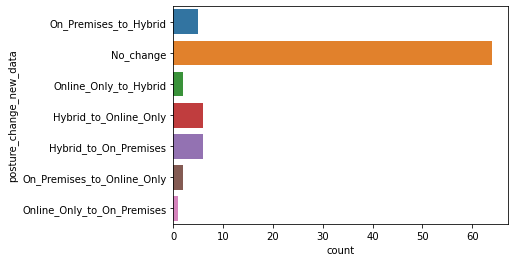

In [65]:
ax = sns.countplot(y='posture_change_new_data', data = final_df)
#plt.xticks(rotation = 90)
plt.show()

In [106]:
final_df.posture_change_new_data.value_counts(normalize = True).round(2)

No_change                     0.74
Hybrid_to_Online_Only         0.07
Hybrid_to_On_Premises         0.07
On_Premises_to_Hybrid         0.06
On_Premises_to_Online_Only    0.02
Online_Only_to_Hybrid         0.02
Online_Only_to_On_Premises    0.01
Name: posture_change_new_data, dtype: float64

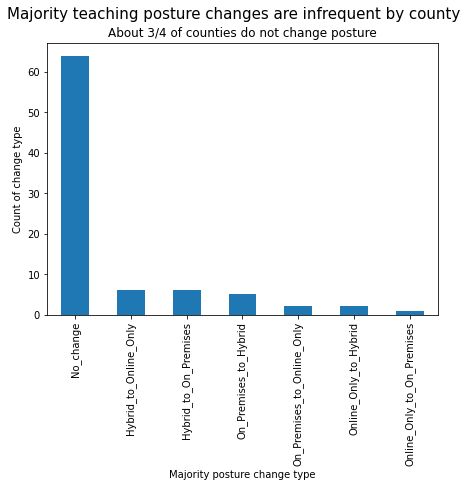

In [146]:
plt.rcParams["figure.figsize"] = (7,5)
final_df.posture_change_new_data.value_counts()\
.plot(kind = 'bar', title = "About 3/4 of counties do not change posture")
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.suptitle('Majority teaching posture changes are infrequent by county ',  fontsize = 15)
plt.show()

In [143]:
plot_df = final_df.merge(data.groupby('county')[['metropolitan_status','nchs_urban_rural_status']].min().reset_index(), on = 'county')

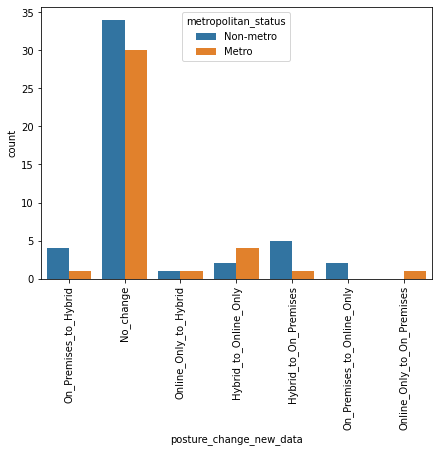

In [147]:
sns.countplot(x = 'posture_change_new_data', data = plot_df, hue = 'metropolitan_status')
plt.xticks(rotation = 90)
plt.show()

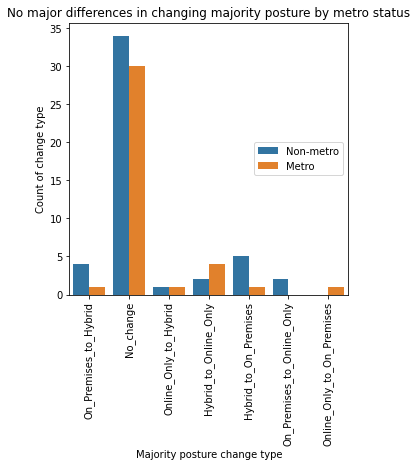

In [157]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.countplot(x = 'posture_change_new_data', data = plot_df, hue = 'metropolitan_status')
plt.legend(loc = "center right")
plt.xticks(rotation = 90)
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('No major differences in changing majority posture by metro status')
plt.show()

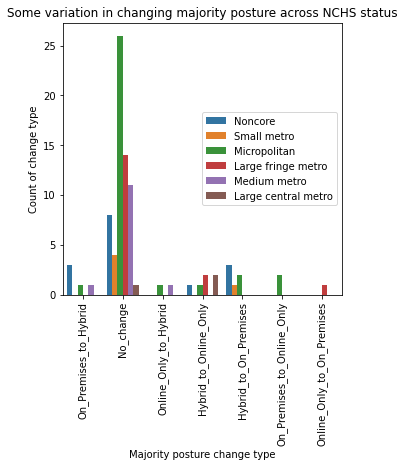

In [159]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.countplot(x = 'posture_change_new_data', data = plot_df, hue = 'nchs_urban_rural_status')
plt.legend(loc = "center right")
plt.xticks(rotation = 90)
plt.ylabel('Count of change type')
plt.xlabel('Majority posture change type')
plt.title('Some variation in changing majority posture across NCHS status')
plt.show()

## Combining new teaching posture to current data set

In [16]:
new_posture = pd.read_csv('teaching_posture_changes.csv', usecols = ['county','major_teaching_start', 'major_teaching_end', 'posture_change_new_data']).rename(columns = {'posture_change_new_data':'posture_change'})
new_posture.head()

,county,major_teaching_start,major_teaching_end,posture_change
0,ADAMS,On_Premises,Hybrid,On_Premises_to_Hybrid
1,ALLEN,Hybrid,Hybrid,No_change
2,ASHLAND,Hybrid,Hybrid,No_change
3,ASHTABULA,Hybrid,Hybrid,No_change
4,ATHENS,Online_Only,Hybrid,Online_Only_to_Hybrid


In [52]:
data = pd.read_csv('deaths_teaching_mobility.csv', index_col = 0, parse_dates = ['date'])
data.set_index('date', inplace = True)
data.head()

,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,rev_newdeaths,...,major_teaching,death_prop,death_per_1000,part_work_prop_7d,part_work_sample_size,full_work_prop_7d,full_work_sample_size,full_work_std,res_visit_by_pop,bar_visit_by_pop
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,0,...,Hybrid,0.0,0.0,0.092631,154,0.077861,154,0.004488,203.568392,NaN
2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,0,...,Hybrid,0.0,0.0,0.100632,641,0.073459,641,0.002243,457.810983,NaN
2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,0,...,Hybrid,0.0,0.0,0.109876,308,0.081989,308,0.003439,249.115243,NaN
2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,0,...,Hybrid,0.0,0.0,0.089040,651,0.072514,651,0.002175,120.561072,NaN
2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,0,...,Hybrid,0.0,0.0,0.101534,336,0.066396,336,0.002957,441.578061,NaN


In [18]:
new_data = data.reset_index().merge(new_posture, on = 'county', how = 'left')
new_data

,date,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,...,part_work_prop_7d,part_work_sample_size,full_work_prop_7d,full_work_sample_size,full_work_std,res_visit_by_pop,bar_visit_by_pop,major_teaching_start,major_teaching_end,posture_change
0,2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,...,0.092631,154,0.077861,154,0.004488,203.568392,NaN,On_Premises,Hybrid,On_Premises_to_Hybrid
1,2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,...,0.100632,641,0.073459,641,0.002243,457.810983,NaN,Hybrid,Hybrid,No_change
2,2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,...,0.109876,308,0.081989,308,0.003439,249.115243,NaN,Hybrid,Hybrid,No_change
3,2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,...,0.089040,651,0.072514,651,0.002175,120.561072,NaN,Hybrid,Hybrid,No_change
4,2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,...,0.101534,336,0.066396,336,0.002957,441.578061,NaN,Online_Only,Hybrid,Online_Only_to_Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33621,2021-02-15,WASHINGTON,39167,39.456906,-81.491214,61549,4413,86,0,26,...,0.068880,329,0.048912,329,0.002136,185.498947,NaN,Hybrid,Hybrid,No_change
33622,2021-02-15,WAYNE,39169,40.829259,-81.888448,117082,7699,208,0,13,...,0.086844,581,0.070372,581,0.002220,210.051477,NaN,Hybrid,Hybrid,No_change
33623,2021-02-15,WILLIAMS,39171,41.560520,-84.584296,37663,2963,77,0,7,...,0.080465,252,0.051966,252,0.002861,59.282975,NaN,Hybrid,On_Premises,Hybrid_to_On_Premises
33624,2021-02-15,WOOD,39173,41.362248,-83.622851,131905,11252,190,0,20,...,0.080080,630,0.051028,630,0.001722,302.133503,10.369948,Hybrid,Hybrid,No_change


In [19]:
#new_data.to_csv('deaths_teaching_mobility_posture.csv')

## adding on columns to account for percentages by county in each posture

In [53]:
wide_teach_start

,COUNTY_start,county_enroll_start,Hybrid_start,On Premises_start,Online Only_start,Other_start,Unknown_start,majority_teaching_start
0,ADAMS,4976.0,0.187299,0.812701,0.000000,0.000000,0.000000,On_Premises
1,ALLEN,16319.0,0.584350,0.415650,0.000000,0.000000,0.000000,Hybrid
2,ASHLAND,7452.0,0.727053,0.129764,0.000000,0.143183,0.000000,Hybrid
3,ASHTABULA,12031.0,0.394065,0.207381,0.000000,0.107306,0.000000,Hybrid
4,ATHENS,7412.0,0.282650,0.000000,0.717350,0.000000,0.000000,Online_Only
...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.757907,0.123306,0.118788,0.000000,0.000000,Hybrid
82,WAYNE,14429.0,0.546538,0.096264,0.000000,0.357197,0.000000,Hybrid
83,WILLIAMS,6076.0,0.539664,0.377057,0.000000,0.083278,0.000000,Hybrid
84,WOOD,20781.0,0.627352,0.143111,0.000000,0.084212,0.145325,Hybrid


In [54]:
wide_teach_end

,COUNTY_end,county_enroll_end,Hybrid_end,On Premises_end,Online Only_end,Other_end,Pending_end,Unknown_end,majority_teaching_end
0,ADAMS,4976.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,Hybrid
1,ALLEN,16319.0,0.478951,0.469882,0.051167,0.000000,0.000000,0.0,Hybrid
2,ASHLAND,7452.0,0.727053,0.000000,0.129764,0.143183,0.000000,0.0,Hybrid
3,ASHTABULA,12031.0,0.633281,0.261574,0.105145,0.000000,0.000000,0.0,Hybrid
4,ATHENS,7412.0,0.640448,0.000000,0.359552,0.000000,0.000000,0.0,Hybrid
...,...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.876694,0.123306,0.000000,0.000000,0.000000,0.0,Hybrid
82,WAYNE,14429.0,0.557835,0.252062,0.000000,0.190103,0.000000,0.0,Hybrid
83,WILLIAMS,6076.0,0.202765,0.713957,0.000000,0.000000,0.083278,0.0,On_Premises
84,WOOD,20781.0,0.622540,0.143111,0.145325,0.000000,0.089024,0.0,Hybrid


In [56]:
wide_teach_start.rename(columns = {'COUNTY_start':'county'}, inplace = True)
wide_teach_end.rename(columns = {'COUNTY_end':'county'}, inplace = True)

In [59]:
posture_percentage = wide_teach_start.merge(wide_teach_end, on = 'county', how = 'inner')
posture_percentage

,county,county_enroll_start,Hybrid_start,On Premises_start,Online Only_start,Other_start,Unknown_start,majority_teaching_start,county_enroll_end,Hybrid_end,On Premises_end,Online Only_end,Other_end,Pending_end,Unknown_end,majority_teaching_end
0,ADAMS,4976.0,0.187299,0.812701,0.000000,0.000000,0.000000,On_Premises,4976.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,Hybrid
1,ALLEN,16319.0,0.584350,0.415650,0.000000,0.000000,0.000000,Hybrid,16319.0,0.478951,0.469882,0.051167,0.000000,0.000000,0.0,Hybrid
2,ASHLAND,7452.0,0.727053,0.129764,0.000000,0.143183,0.000000,Hybrid,7452.0,0.727053,0.000000,0.129764,0.143183,0.000000,0.0,Hybrid
3,ASHTABULA,12031.0,0.394065,0.207381,0.000000,0.107306,0.000000,Hybrid,12031.0,0.633281,0.261574,0.105145,0.000000,0.000000,0.0,Hybrid
4,ATHENS,7412.0,0.282650,0.000000,0.717350,0.000000,0.000000,Online_Only,7412.0,0.640448,0.000000,0.359552,0.000000,0.000000,0.0,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,WASHINGTON,5312.0,0.757907,0.123306,0.118788,0.000000,0.000000,Hybrid,5312.0,0.876694,0.123306,0.000000,0.000000,0.000000,0.0,Hybrid
82,WAYNE,14429.0,0.546538,0.096264,0.000000,0.357197,0.000000,Hybrid,14429.0,0.557835,0.252062,0.000000,0.190103,0.000000,0.0,Hybrid
83,WILLIAMS,6076.0,0.539664,0.377057,0.000000,0.083278,0.000000,Hybrid,6076.0,0.202765,0.713957,0.000000,0.000000,0.083278,0.0,On_Premises
84,WOOD,20781.0,0.627352,0.143111,0.000000,0.084212,0.145325,Hybrid,20781.0,0.622540,0.143111,0.145325,0.000000,0.089024,0.0,Hybrid


In [66]:
new_data = data.reset_index().merge(posture_percentage, on = 'county', how = 'left')
new_data

,date,county,fips,cnty_lat,cnty_long,population,cumconfirmed,cumdeaths,newdeaths,newconfirmed,...,Unknown_start,majority_teaching_start,county_enroll_end,Hybrid_end,On Premises_end,Online Only_end,Other_end,Pending_end,Unknown_end,majority_teaching_end
0,2020-01-22,ADAMS,39001,38.845411,-83.471896,27960,0,0,0,0,...,0.000000,On_Premises,4976.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,Hybrid
1,2020-01-22,ALLEN,39003,40.772852,-84.108023,106160,0,0,0,0,...,0.000000,Hybrid,16319.0,0.478951,0.469882,0.051167,0.000000,0.000000,0.0,Hybrid
2,2020-01-22,ASHLAND,39005,40.847723,-82.272808,53973,0,0,0,0,...,0.000000,Hybrid,7452.0,0.727053,0.000000,0.129764,0.143183,0.000000,0.0,Hybrid
3,2020-01-22,ASHTABULA,39007,41.708603,-80.748302,98637,0,0,0,0,...,0.000000,Hybrid,12031.0,0.633281,0.261574,0.105145,0.000000,0.000000,0.0,Hybrid
4,2020-01-22,ATHENS,39009,39.334256,-82.042786,67121,0,0,0,0,...,0.000000,Online_Only,7412.0,0.640448,0.000000,0.359552,0.000000,0.000000,0.0,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33621,2021-02-15,WASHINGTON,39167,39.456906,-81.491214,61549,4413,86,0,26,...,0.000000,Hybrid,5312.0,0.876694,0.123306,0.000000,0.000000,0.000000,0.0,Hybrid
33622,2021-02-15,WAYNE,39169,40.829259,-81.888448,117082,7699,208,0,13,...,0.000000,Hybrid,14429.0,0.557835,0.252062,0.000000,0.190103,0.000000,0.0,Hybrid
33623,2021-02-15,WILLIAMS,39171,41.560520,-84.584296,37663,2963,77,0,7,...,0.000000,Hybrid,6076.0,0.202765,0.713957,0.000000,0.000000,0.083278,0.0,On_Premises
33624,2021-02-15,WOOD,39173,41.362248,-83.622851,131905,11252,190,0,20,...,0.145325,Hybrid,20781.0,0.622540,0.143111,0.145325,0.000000,0.089024,0.0,Hybrid


In [69]:
new_data.rename(
    columns = {'majority_teaching_start':'major_teaching_start',
               'majority_teaching_end':'major_teaching_end'},
inplace = True)
new_data.columns

Index(['date', 'county', 'fips', 'cnty_lat', 'cnty_long', 'population',
       'cumconfirmed', 'cumdeaths', 'newdeaths', 'newconfirmed',
       'rev_newdeaths', 'rev_newconfirmed', 'rev_newconfirmed2', 'rmed_cases',
       'ylower', 'yupper', 'population_density', 'metropolitan_status',
       'nchs_urban_rural_status', 'county_enroll', 'Hybrid', 'On_Premises',
       'Online_Only', 'Other', 'Pending', 'Unknown', 'major_teaching',
       'death_prop', 'death_per_1000', 'part_work_prop_7d',
       'part_work_sample_size', 'full_work_prop_7d', 'full_work_sample_size',
       'full_work_std', 'res_visit_by_pop', 'bar_visit_by_pop',
       'county_enroll_start', 'Hybrid_start', 'On Premises_start',
       'Online Only_start', 'Other_start', 'Unknown_start',
       'major_teaching_start', 'county_enroll_end', 'Hybrid_end',
       'On Premises_end', 'Online Only_end', 'Other_end', 'Pending_end',
       'Unknown_end', 'major_teaching_end'],
      dtype='object')

## the new data

This data can be used to generate visualizations with changes in R_t and compare across different teaching posture

In [ ]:
#new_data.to_csv('deaths_teaching_mobility_posture_pct.csv')